<a href="https://colab.research.google.com/github/princeKike27/Poland-House-Prices-Prediction/blob/main/Poland_House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poland House Prices Prediction

For this project I analyzed data from the housing market in 3 cities in Poland Krakow, Warsaw and Poznań ....

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch

In [2]:
# load dataset
df_houses = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Poland-House-Prices-Prediction/main/poland_houses.csv',
                        encoding='latin-1', sep=';')

df_houses

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,500.492.242,199.703.793,749000.0,3.0,74.05,2021.0
1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,522.497.745,211.068.857,240548.0,1.0,24.38,2021.0
2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,500.669.642,199.200.249,427000.0,2.0,37.00,1970.0
3,Grunwald,Poznañ,2.0,4315.0,52.404.212,16.882.542,1290000.0,5.0,166.00,1935.0
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212.225,209.726.299,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...,...,...
23759,Stare Miasto Naramowice,Poznañ,0.0,3976.0,524.496.489,169.494.082,543000.0,4.0,77.00,2020.0
23760,W³ochy,Warszawa,4.0,10206.0,521.861.093,209.484.377,910000.0,3.0,71.00,2017.0
23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0.0,4952.0,523.973.449,169.619.394,430695.0,3.0,50.67,2022.0
23762,Podgórze Duchackie Walerego S³awka,Kraków,6.0,24148.0,500.242.313,19.959.569,359000.0,2.0,38.86,2021.0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Data Cleaning & Tidying

In [3]:
# shape of df 
print(df_houses.shape)

(23764, 10)


In [4]:
# column types
df_houses.dtypes

address       object
city          object
floor        float64
id           float64
latitude      object
longitude     object
price        float64
rooms        float64
sq           float64
year         float64
dtype: object

In [5]:
# change floor, rooms to int
df_houses['floor'] = df_houses['floor'].astype(int)
df_houses['rooms'] = df_houses['rooms'].astype(int)


In [26]:
# unique values of year column
df_houses.year.unique()

array([2021, 1970, 1935, 2020, 2022, 2003, 1982, 1999, 1968, 1989, 2019,
       2005, 1930, 2008, 1960, 2013, 1936, 1890, 2010, 1972, 2016, 2009,
       1990, 2018, 2000, 1974, 1976, 2017, 1980, 1938, 1926, 1963, 2015,
       2012, 1971, 1949, 1977, 1920, 2014, 2007, 2001, 1911, 1973, 2006,
       1975, 1978, 1987, 1984, 2023, 1904, 2004, 1956, 1900, 1966, 1950,
       1931, 1912, 1951, 1955, 1983, 1964, 1905, 1962, 2011, 1939, 1965,
       1967, 2002, 1952, 1927, 1991, 1985, 1953, 1969, 1979, 1910, 1988,
       1954, 1997, 1998, 1886, 1992, 1996, 1959, 1880, 1981, 1916, 1986,
       1918, 1879, 1946, 1901, 1780, 1995, 1908, 1937, 1994, 1864, 1919,
       1923, 1958, 1993, 1915, 1948, 1907, 1957, 1961, 1902, 1924, 1885,
       1934, 1947, 1925, 1913, 1892, 1922, 1929, 1841, 1933, 1897, 1895,
       1932, 1854, 1893, 1903, 1906, 1830, 2980,   80, 1940, 1914, 1760,
       1898, 1928,  202, 1942, 1876, 1899,   70, 1896, 1945, 1784, 1860,
       1889, 1883, 1917,  195, 1921,   81, 1943, 18

In [30]:
# select rows with years 75, 214, 2980, 80, 202, 70, 195, 81, 200 
df_houses[(df_houses['year'] == 75) | (df_houses['year'] == 214) | (df_houses['year'] == 2980) |
          (df_houses['year'] == 80) | (df_houses['year'] == 202) | (df_houses['year'] == 70) |
          (df_houses['year'] == 195) | (df_houses['year'] == 81) | (df_houses['year'] == 200)]

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
4345,Targówek Mokra,Warszawa,8,16082.0,522.319.581,210.067.249,520000.0,3,56.00,2980
4513,Wola Krochmalna,Warszawa,10,13832.0,522.319.581,210.067.249,320000.0,1,28.00,80
6458,Bie¿anów-Prokocim Bie¿anów Pod³êska,Kraków,2,21883.0,500.469.432,19.997.153.435.836.600,410000.0,2,48.00,202
7659,Nowe Miasto G³uszyna,Poznañ,2,1603.0,523.263.616,169.628.861,235000.0,2,40.50,70
8972,Grunwald £azarz ul. G³ogowska,Poznañ,1,56.0,524.016.616,169.100.607,329000.0,2,27.80,195
10408,Bemowo ul. Karabeli,Warszawa,9,8116.0,522.319.581,210.067.249,450000.0,2,47.80,81
14431,Stare Miasto Pi¹tkowo os. Boles³awa Chrobrego,Poznañ,1,640.0,524.006.632,1.691.973.259.178.080,375000.0,3,64.00,80
19206,Krowodrza Krowodrza Górka S³omczyñskiego,Kraków,0,27281.0,500.469.432,19.997.153.435.836.600,655000.0,3,73.22,200


In [33]:
# replace years to correct values 
df_houses['year'].replace({2980: 1980,
                           80: 1980,
                           202: 2002,
                           70: 1970,
                           195: 1950,
                           81: 1981,
                           80: 1980,
                           200: 2000,
                           75: 1975,
                           214: 2014}, inplace=True)

In [39]:
# check changes
df_houses.dtypes

address       object
city          object
floor          int64
id           float64
latitude      object
longitude     object
price        float64
rooms          int64
sq           float64
year           int64
dtype: object

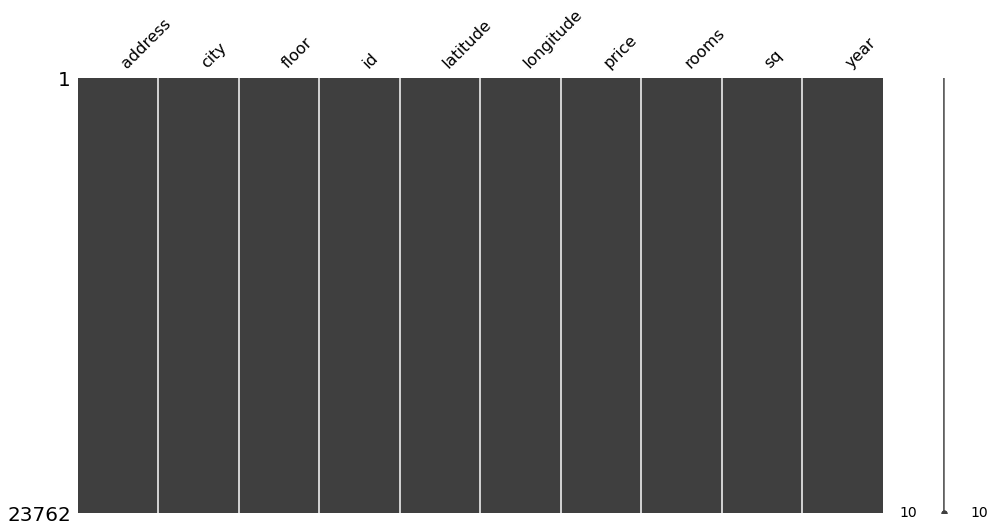

In [40]:
# check for missing values
import missingno as msg

msg.matrix(df_houses, figsize=(16, 8))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Data Analysis

In [41]:
# descriptive statistics of numeric columns
df_houses.describe()

,floor,id,price,rooms,sq,year
count,23762.000000,23762.000000,2.376200e+04,23762.000000,2.376200e+04,23762.000000
mean,2.808854,15622.191735,6.493485e+05,2.620739,1.027288e+02,2001.210504
std,2.463537,8617.609021,5.327189e+05,0.996566,6.533963e+03,31.165719
min,0.000000,1.000000,5.000000e+03,1.000000,8.800000e+00,1070.000000
25%,1.000000,8420.250000,4.114734e+05,2.000000,4.200000e+01,1985.000000
50%,2.000000,15640.500000,5.200000e+05,3.000000,5.389500e+01,2019.000000
75%,4.000000,23111.750000,6.999990e+05,3.000000,6.892500e+01,2021.000000
max,10.000000,30308.000000,1.500000e+07,10.000000,1.007185e+06,2024.000000


### Houses per City

In [50]:
# function to calculate number_houses and avg_price

def city_calc(df): 
  # dict to store columns
  calc = {}
  calc['number_houses'] = len(df.id)
  calc['avg_price'] = df['price'].mean()

  # return a Pandas Series
  return pd.Series(calc, index=['number_houses', 'avg_price'])

In [53]:
houses_city = df_houses.groupby(['city']).apply(city_calc).reset_index()

# add %_homes column
houses_city['%_homes'] = (houses_city.number_houses / len(df_houses)) * 100

houses_city.head()

,city,number_houses,avg_price,%_homes
0,Kraków,9764.0,593756.068258,41.090817
1,Poznañ,4149.0,468527.120154,17.460651
2,Warszawa,9849.0,780634.258762,41.448531


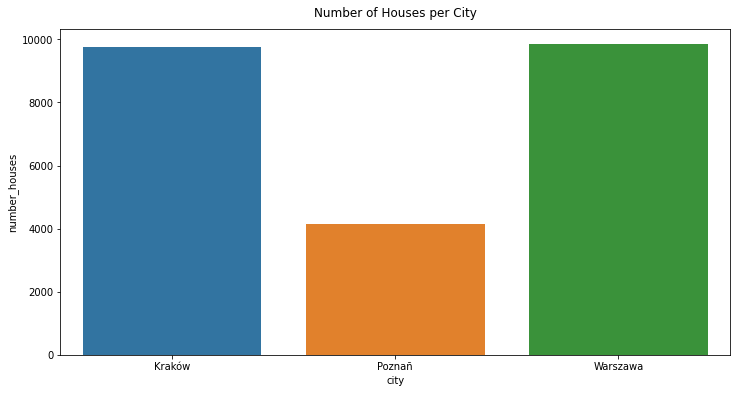

In [54]:
# plot number of houses per city
f, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x='city', y='number_houses', data=houses_city)

plt.title('Number of Houses per City', pad=12)

plt.show()

- As can be seen in the graph and table above more than 80% of the houses are located in Warsaw and Krakow $9851$ and $9764$ respectively.

- The avg house price per city is higher in Warsaw which is the capital city of Poland $780,634$ $zloty$ ($167,348$ $euros$), followed by Krakow $593,756$ $zloty$ ($127,286$ $euros$) and by Poznan, the smallest of the three cities, $468,527$ $zloty$ ($100,440$ $euros$)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Avg House Price per Year 